# INSTALLING LIBRARIES

In [1]:
!pip install squarify

# IMPORTING LIBRARIES

In [2]:
# Google Drive Integration
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import ast

# Machine learning and NLP
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Text processing and analysis
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from wordcloud import WordCloud

In [4]:
# Downloading necessary NLTK data
nltk.download('stopwords')  # Stopwords list
nltk.download('punkt')  # Tokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# LOADING DATASETS

In [5]:
#Load Cleaned Dataset
Main_df = pd.read_csv('/content/drive/MyDrive/Dissertation24/Cleaned_Reviews.csv')
Train_df = pd.read_csv('/content/drive/MyDrive/Dissertation24/Training_Reviews.csv')
Test_df = pd.read_csv('/content/drive/MyDrive/Dissertation24/Testing_Reviews.csv')
Manual_df = pd.read_csv('/content/drive/MyDrive/Dissertation24/Cleaned_Manually_Labelled_Reviews.csv')
Main_df_copy = Main_df.copy()
Train_df_copy = Train_df.copy()
Test_df_copy = Test_df.copy()
Manual_df_copy = Manual_df.copy()

In [6]:
# Print the Main_df DataFrame
print(Main_df_copy)

# Get the Main_df DataFrame structure
print(Main_df_copy.info())

# Get Main_df descriptive statistics
print(Main_df_copy.describe(include='all'))

# Print the Train_df DataFrame
print(Train_df_copy)

# Get the Train_df DataFrame structure
print(Train_df_copy.info())

# Get Train_df descriptive statistics
print(Train_df_copy.describe(include='all'))

# Print the Test_df DataFrame
print(Test_df_copy)

# Get the Test_df DataFrame structure
print(Test_df_copy.info())

# GetTest_df descriptive statistics
print(Test_df_copy.describe(include='all'))

# Print the Manual_df DataFrame
print(Manual_df_copy)

# Get the Manual_df DataFrame structure
print(Manual_df_copy.info())

# Get Manual_df descriptive statistics
print(Manual_df_copy.describe(include='all'))

                                                 content  score          at  \
0      use great app thing great end end encryption u...      4  2024-07-25   
1      whatsapp android goto messaging app incredibly...      5  2024-07-16   
2      good app although could made lot better visual...      3  2024-07-26   
3      recently got new android phone tried verify ne...      1  2024-07-09   
4      extremely disappointing since facebook got inv...      1  2024-05-22   
...                                                  ...    ...         ...   
48595  great app usually help calm always understood ...      5  2019-12-26   
48596  download function doesnt work properly even th...      2  2019-09-05   
48597  used use daily basis thing listened locked beh...      1  2019-10-20   
48598  used love ap lot option still available free s...      2  2020-10-25   
48599  love app mostly used sleepcasts cant use expen...      3  2020-04-26   

                              source  length  
0   

In [7]:
# Define a Function to Convert Data Types
def convert_data_types(df):
    df['content'] = df['content'].astype('string')
    df['source'] = df['source'].astype('string')
    df['at'] = pd.to_datetime(df['at'], format='%Y-%m-%d')
    return df

Main_df_copy = convert_data_types(Main_df_copy)
Train_df_copy = convert_data_types(Train_df_copy)
Test_df_copy = convert_data_types(Test_df_copy)


# FEATURE ENGINEERING

## SENTIMENT LABELLING

In [8]:
# Load model and tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:
def predict_sentiment(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    model.eval()

    with torch.no_grad():
        # Get predictions
        logits = model(**inputs).logits

    # Convert logits to probabilities
    probabilities = torch.softmax(logits, dim=1)

    # Get the predicted labels
    predicted_labels = torch.argmax(probabilities, dim=1).numpy()

    return predicted_labels[0], probabilities.numpy()[0]

# Create new columns for label and probabilities
Train_df_copy[['label', 'probabilities']] = Train_df_copy['content'].apply(lambda x: pd.Series(predict_sentiment(x)))

In [10]:
print(Train_df_copy)

                                                 content  score         at  \
0                                              fantastic      5 2020-03-14   
1      recent update notification function working pr...      1 2024-07-16   
2      fantastic app noticed added cost ireland used ...      5 2021-12-04   
3      horrible experience ever got contacted deliver...      1 2021-05-20   
4      thre mediation fall asleep nice ability wake w...      3 2022-08-08   
...                                                  ...    ...        ...   
38875  clear concise comprehensive impartial everythi...      5 2021-10-13   
38876  great app went ahead purchased subscription us...      4 2019-04-16   
38877  kyc process broken take long get agent close c...      1 2020-07-01   
38878  although good initiative meta introduce ai act...      3 2024-07-11   
38879                      best apps bus time thanjs f l      5 2020-10-12   

                               source  length  label  \
0      

In [11]:
Train_df_copy.to_csv('/content/drive/MyDrive/Dissertation24/Labelled_Reviews.csv', index=False)
print("Reviews have been saved to Labelled_Reviews.csv")

Reviews have been saved to Labelled_Reviews.csv


# EXPLORATORY DATA ANALYSIS AND VISUALISATION

## RoBERTa-LABELLED DATASET

<ipython-input-12-2c7d969ef471>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x='score', data=data, palette=score_palette)


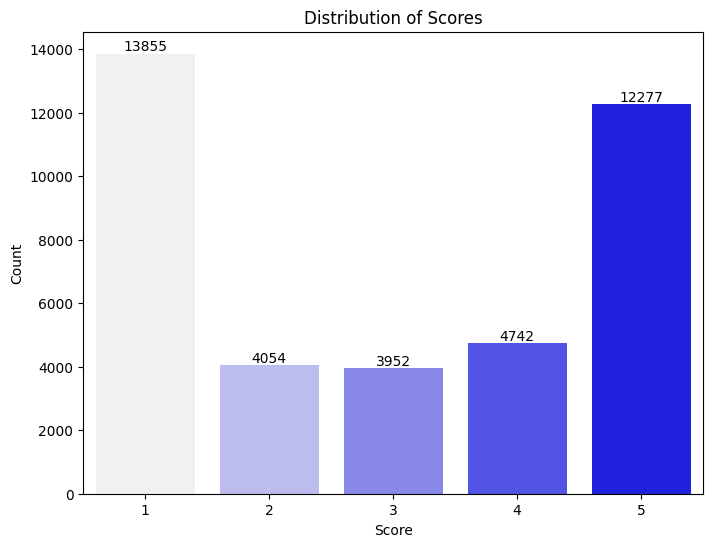

In [12]:
def plot_score_distribution(data):
    # Create a custom color palette for the score column using a gradient from light to dark blue
    score_cmap = sns.light_palette("blue", as_cmap=True)
    # Generate a list of colors for each unique score in the data
    score_palette = [score_cmap(i) for i in np.linspace(0, 1, len(data['score'].unique()))]

    # Set up the plot for the distribution of scores
    plt.figure(figsize=(8, 6))
    # Plot the count of each score in the data using the custom color palette
    ax1 = sns.countplot(x='score', data=data, palette=score_palette)

    # Annotate the bars with the count of occurrences
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}',  # Annotation text
                     (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
                     ha='center', va='center', xytext=(0, 5),  # Alignments and offset
                     textcoords='offset points')  # Text offset relative to the bar

    # Add title and labels to the plot
    plt.title('Distribution of Scores')
    plt.xlabel('Score')
    plt.ylabel('Count')
    plt.show()  # Display the plot

plot_score_distribution(Train_df_copy)

<ipython-input-13-8e66cd908af8>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([label_mapping[label] for label in ax2.get_xticks()])


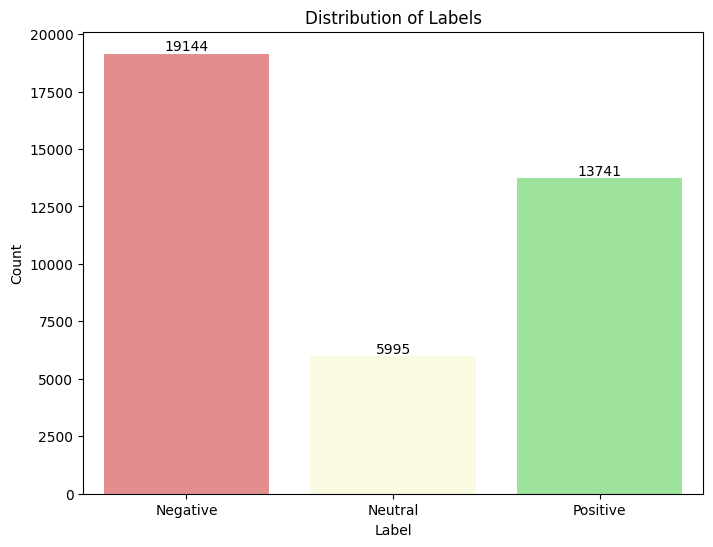

In [13]:
def plot_label_distribution(data):
    # Define custom colors for each label: Negative (light red), Neutral (light yellow), Positive (light green)
    label_colors = {0: 'lightcoral', 1: 'lightyellow', 2: 'lightgreen'}

    # Create a color palette for the label column based on the predefined colors
    label_palette = [label_colors[key] for key in sorted(label_colors.keys())]

    # Mapping for labels to human-readable names
    label_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

    # Set up the plot for the distribution of labels
    plt.figure(figsize=(8, 6))
    # Plot the count of each label using the custom color palette without the legend
    ax2 = sns.countplot(x='label', data=data, hue='label', palette=label_palette, legend=False)

    # Annotate the bars with the count of occurrences
    for p in ax2.patches:
        ax2.annotate(f'{int(p.get_height())}',  # Annotation text
                     (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
                     ha='center', va='center', xytext=(0, 5),  # Alignments and offset
                     textcoords='offset points')  # Text offset relative to the bar

    # Update the x-axis labels to the custom labels (Negative, Neutral, Positive)
    ax2.set_xticklabels([label_mapping[label] for label in ax2.get_xticks()])

    # Add title and labels to the plot
    plt.title('Distribution of Labels')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()  # Display the plot

plot_label_distribution(Train_df_copy)

<Figure size 1200x600 with 0 Axes>

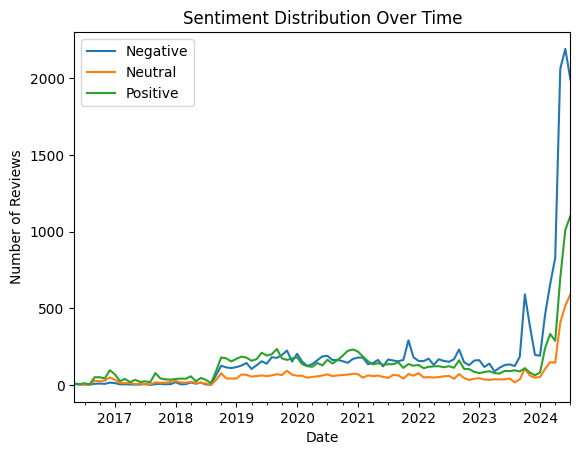

In [14]:
def plot_sentiment_distribution_over_time(df):
    # Set up the plot with a figure size of 12x6 inches
    plt.figure(figsize=(12, 6))

    # Resample the data to a monthly frequency and count the number of labels (sentiments) for each month
    # Unstack the data to have separate columns for each sentiment (Negative, Neutral, Positive)
    df.set_index('at').resample('M')['label'].value_counts().unstack().plot(kind='line')

    # Set the title and axis labels
    plt.title('Sentiment Distribution Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Reviews')

    # Add a legend to differentiate between Negative, Neutral, and Positive sentiments
    plt.legend(['Negative', 'Neutral', 'Positive'])

    # Display the plot
    plt.show()

plot_sentiment_distribution_over_time(Train_df_copy)

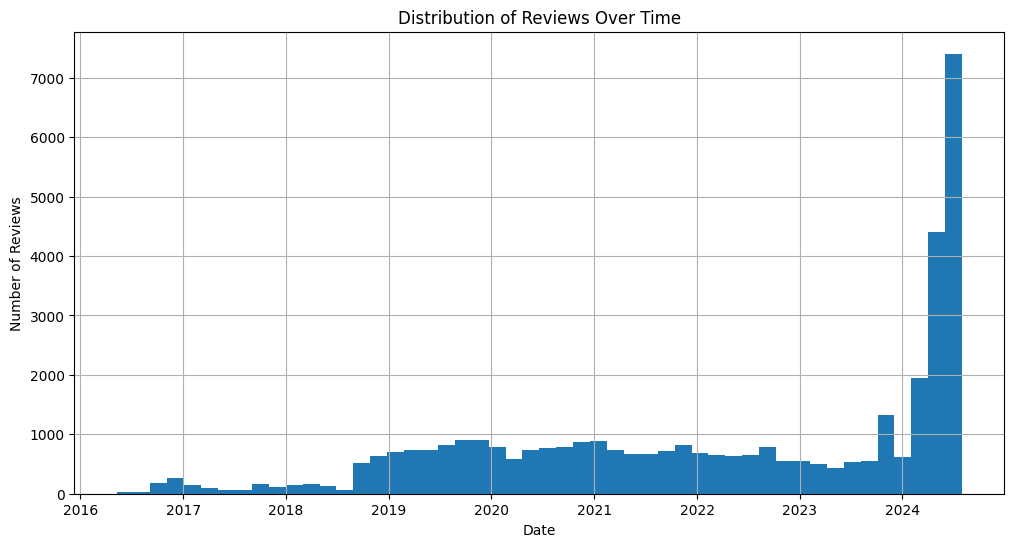

In [15]:
def plot_distribution_of_reviews_over_time(df):
    # Set up the plot with a figure size of 12x6 inches
    plt.figure(figsize=(12, 6))

    # Plot a histogram of the review dates with 50 bins
    df['at'].hist(bins=50)

    # Set the title and axis labels
    plt.title('Distribution of Reviews Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Reviews')

    # Display the plot
    plt.show()

plot_distribution_of_reviews_over_time(Train_df_copy)

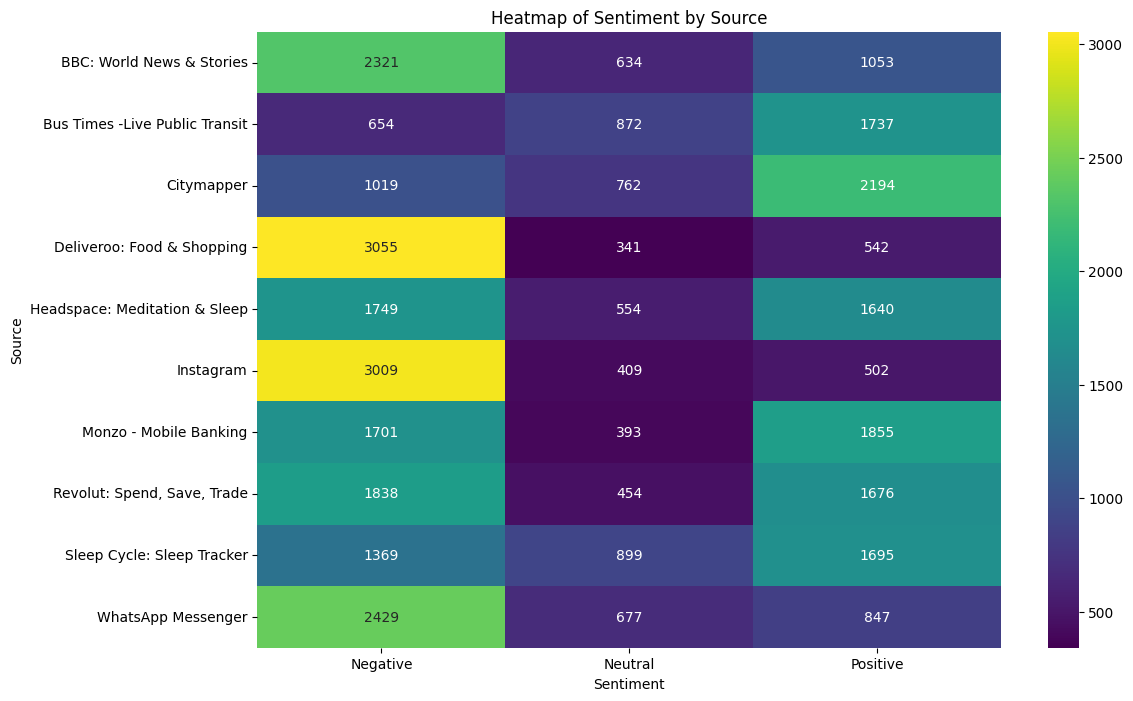

In [16]:
def plot_sentiment_by_source_heatmap(df):
    # Group the data by 'source' and 'label', count the occurrences, and fill missing values with 0
    sentiment_by_source_heatmap = df.groupby(['source', 'label']).size().unstack().fillna(0)

    # Rename the columns to make them more descriptive
    sentiment_by_source_heatmap.columns = ['Negative', 'Neutral', 'Positive']

    # Set up the plot with a figure size of 12x8 inches
    plt.figure(figsize=(12, 8))

    # Create a heatmap of sentiment by source using a 'viridis' colormap and displaying the counts
    sns.heatmap(sentiment_by_source_heatmap, annot=True, fmt='g', cmap='viridis')

    # Set the title and axis labels
    plt.title('Heatmap of Sentiment by Source')
    plt.xlabel('Sentiment')
    plt.ylabel('Source')

    # Display the plot
    plt.show()

plot_sentiment_by_source_heatmap(Train_df_copy)

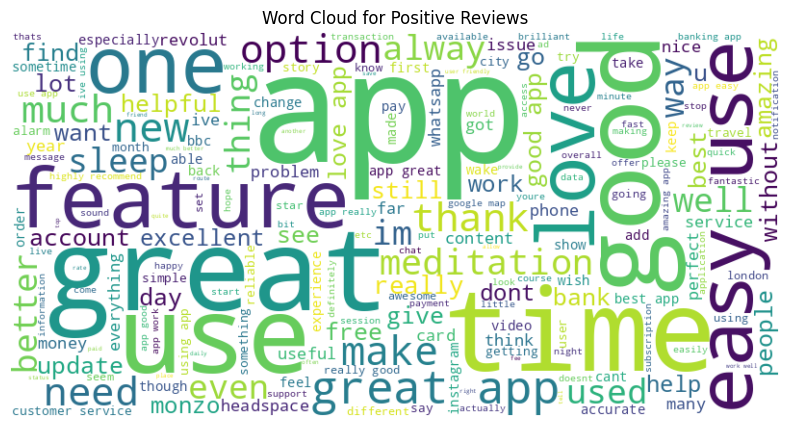

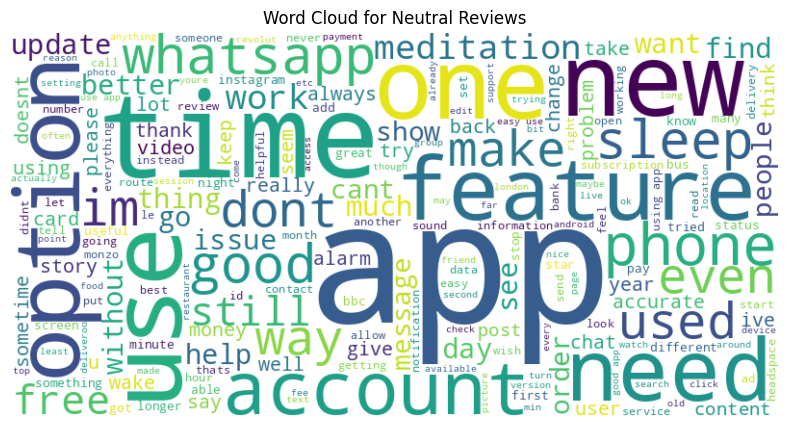

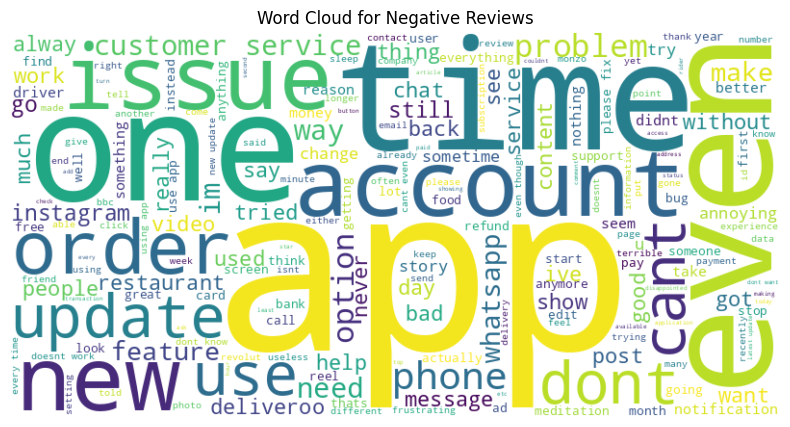

In [17]:
def plot_generate_wordcloud(df, sentiment_label):
    # Join all the reviews that match the sentiment label into a single string
    text = " ".join(review for review in df[df['label'] == sentiment_label]['content'])

    # Generate a word cloud from the text
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    # Add a title indicating the sentiment of the reviews
    plt.title(f'Word Cloud for {"Positive" if sentiment_label == 2 else "Neutral" if sentiment_label == 1 else "Negative"} Reviews')
    plt.show()

plot_generate_wordcloud(Train_df_copy, 2)  # Positive reviews
plot_generate_wordcloud(Train_df_copy, 1)  # Neutral reviews
plot_generate_wordcloud(Train_df_copy, 0)  # Negative reviews

<ipython-input-18-8679bf1db0b3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='score', y='source', data=sorted_average_scores, palette='viridis')


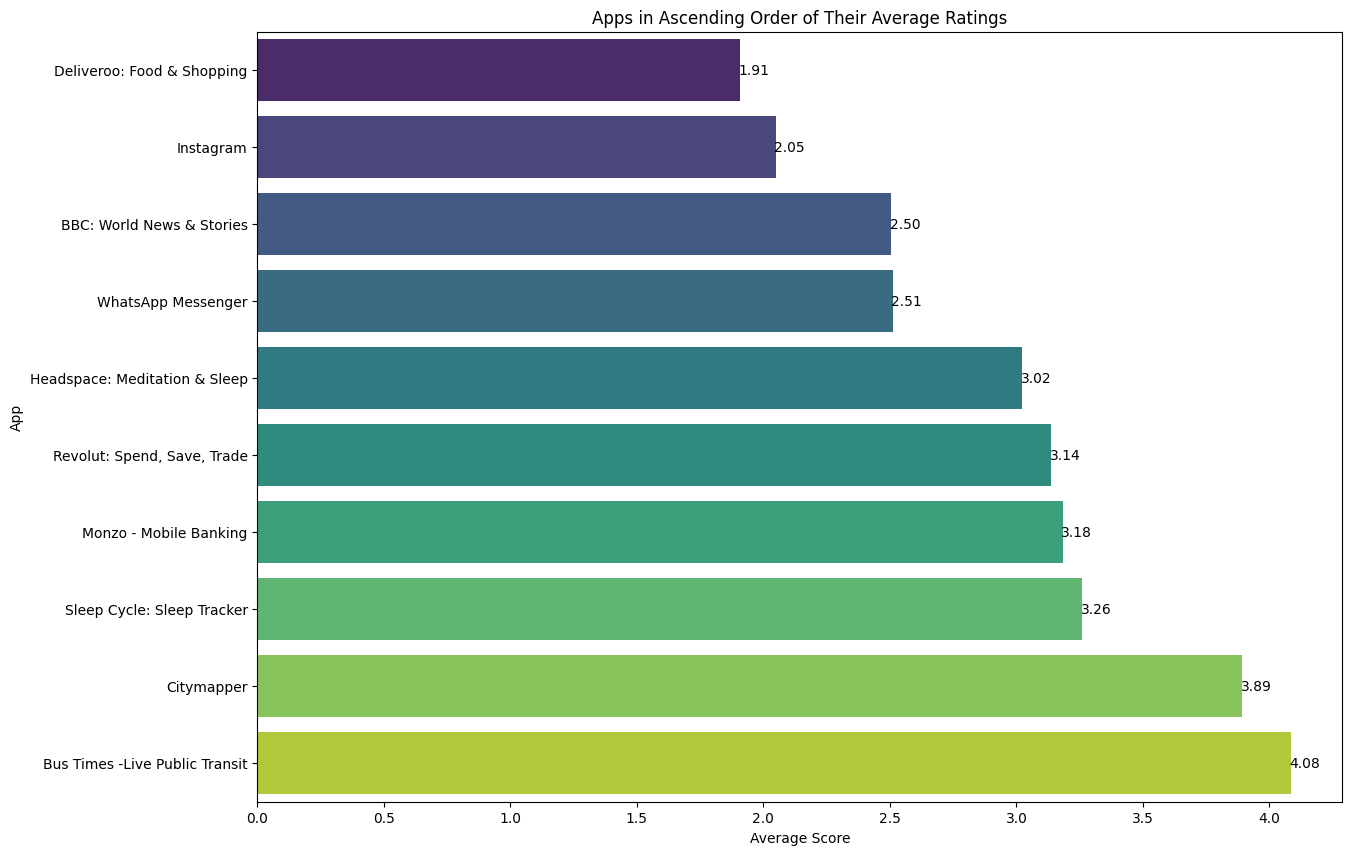

In [18]:
def plot_average_scores(df):
    # Calculate the average score for each app and reset the index
    average_scores = df.groupby('source')['score'].mean().reset_index()

    # Sort the apps by their average scores in ascending order
    sorted_average_scores = average_scores.sort_values(by='score')

    # Create a bar plot for the sorted average scores
    plt.figure(figsize=(14, 10))
    ax = sns.barplot(x='score', y='source', data=sorted_average_scores, palette='viridis')

    # Add the average score as text on each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')

    # Set the title and labels for the plot
    plt.title('Apps in Ascending Order of Their Average Ratings')
    plt.xlabel('Average Score')
    plt.ylabel('App')

    # Ensure y-axis labels are horizontal for better readability
    plt.yticks(rotation=0)

    # Display the plot
    plt.show()

plot_average_scores(Train_df_copy)

<ipython-input-19-f76d715bd03c>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=features, palette='viridis')


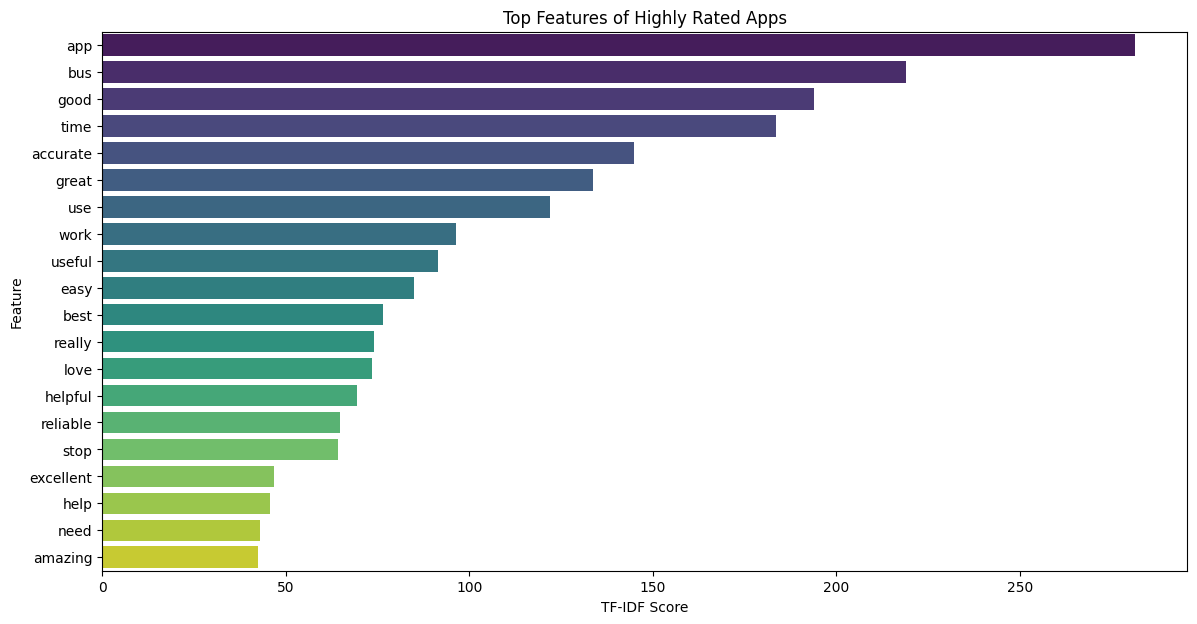

<ipython-input-19-f76d715bd03c>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=features, palette='viridis')


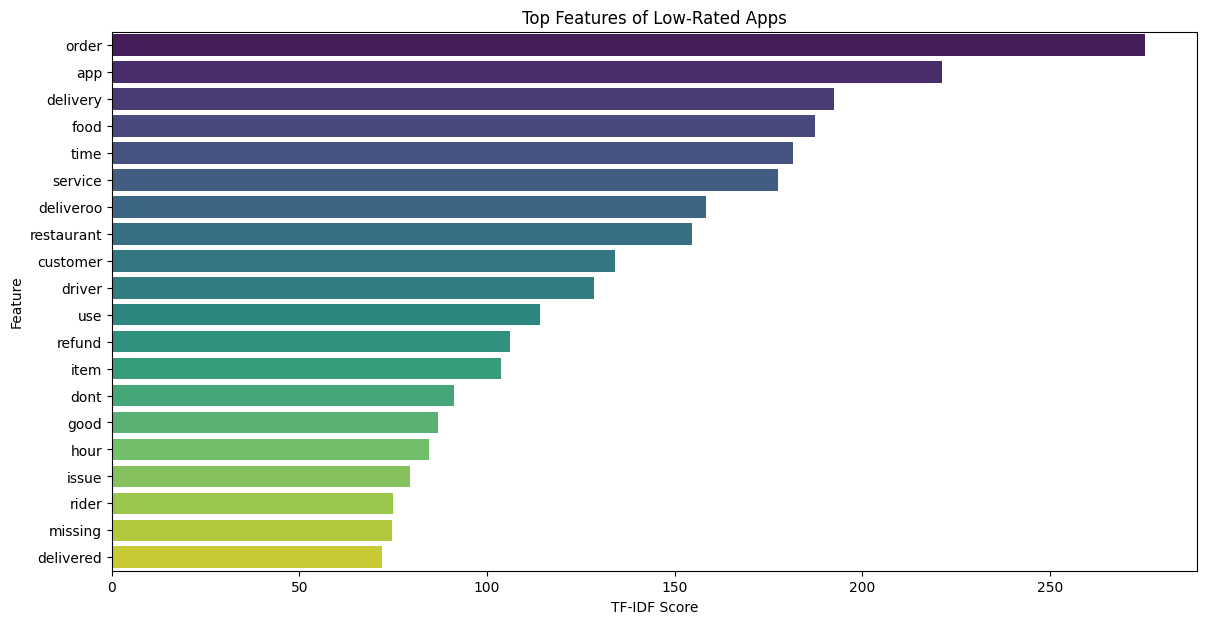

In [19]:
def calculate_average_scores(df, high_threshold=4.0, low_threshold=2.0):
    # Calculate the average score for each source
    average_scores = df.groupby('source')['score'].mean().reset_index()

    # Identify sources with high and low ratings based on thresholds
    high_rated_apps = average_scores[average_scores['score'] >= high_threshold]['source']
    low_rated_apps = average_scores[average_scores['score'] <= low_threshold]['source']

    # Extract reviews corresponding to high and low-rated sources
    high_rated_reviews = df[df['source'].isin(high_rated_apps)]['content']
    low_rated_reviews = df[df['source'].isin(low_rated_apps)]['content']

    return high_rated_reviews, low_rated_reviews

def get_top_features(reviews, n=20):
    # Transform the reviews into a TF-IDF matrix, limiting to the top 1000 features
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(reviews)

    # Get feature names and compute their corresponding TF-IDF scores
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = X.sum(axis=0).A1

    # Create a dictionary of features and their TF-IDF scores, then sort by score
    tfidf_freq = dict(zip(feature_names, tfidf_scores))
    top_features = pd.DataFrame(sorted(tfidf_freq.items(), key=lambda x: x[1], reverse=True), columns=['Feature', 'Score']).head(n)

    return top_features

def plot_top_features(features, title):
    # Plot a bar chart of the top features based on TF-IDF scores
    plt.figure(figsize=(14, 7))
    sns.barplot(x='Score', y='Feature', data=features, palette='viridis')
    plt.title(title)
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Feature')
    plt.show()

def plot_main(Train_df_copy):
    # Calculate high and low-rated reviews based on average scores
    high_rated_reviews, low_rated_reviews = calculate_average_scores(Train_df_copy)

    # Get the top features for high and low-rated reviews
    top_high_features = get_top_features(high_rated_reviews)
    top_low_features = get_top_features(low_rated_reviews)

    # Plot the top features for high-rated and low-rated reviews
    plot_top_features(top_high_features, 'Top Features of Highly Rated Apps')
    plot_top_features(top_low_features, 'Top Features of Low-Rated Apps')

plot_main(Train_df_copy)

<ipython-input-20-537b92a76254>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


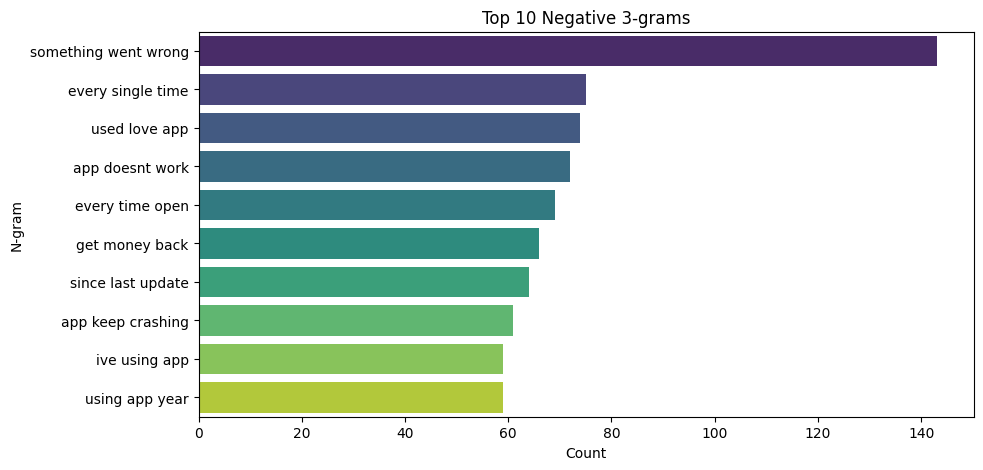

<ipython-input-20-537b92a76254>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


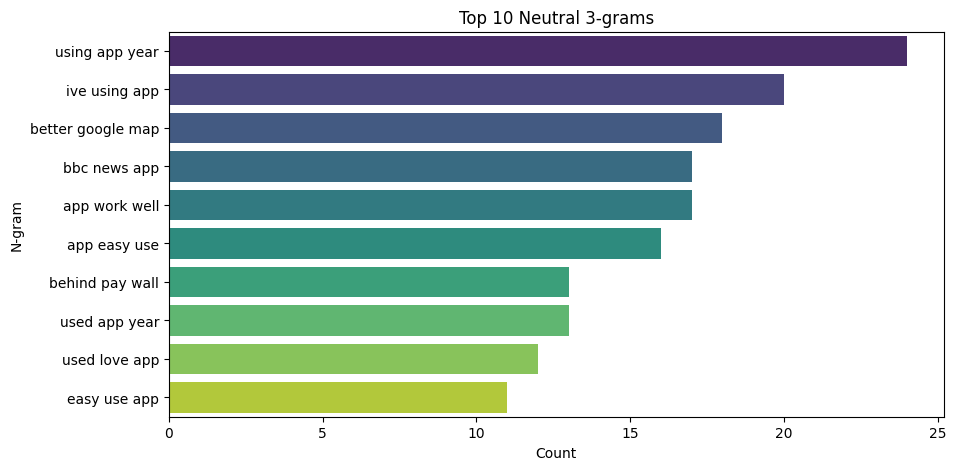

<ipython-input-20-537b92a76254>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


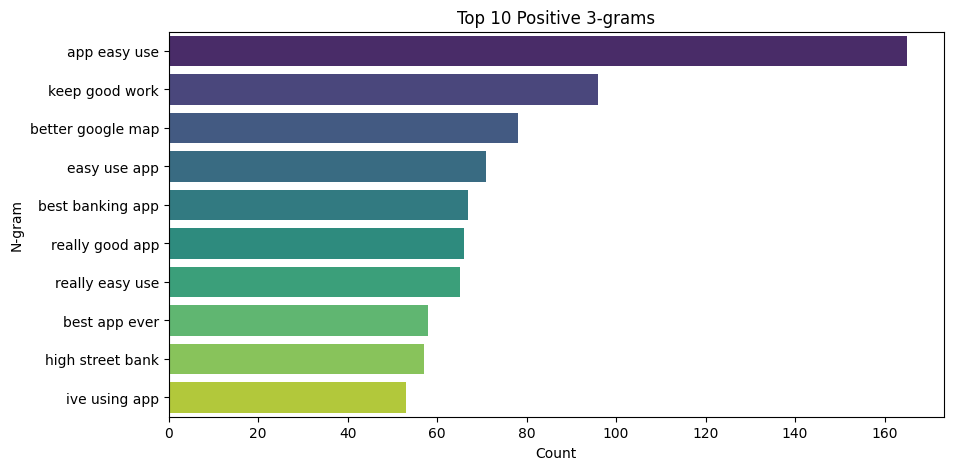

In [20]:
def plot_ngrams(words, counts, title='Top N-grams'):
    # Set the plot size
    plt.figure(figsize=(10, 5))
    # Create a bar plot with the provided words and counts
    sns.barplot(x=counts, y=words, palette='viridis')
    # Set the title and labels for the plot
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('N-gram')
    # Display the plot
    plt.show()

def analyze_ngrams_for_sentiment(texts, n=3, sentiment='Sentiment'):
    # Create a CountVectorizer to generate n-grams from the text data
    vec = CountVectorizer(ngram_range=(n, n)).fit(texts)
    # Transform the text data into a bag-of-words representation
    bag_of_words = vec.transform(texts)
    # Sum the occurrences of each n-gram across all documents
    sum_words = bag_of_words.sum(axis=0)
    # Extract the n-grams and their corresponding frequencies
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    # Sort the n-grams by frequency in descending order
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    # Extract the top 10 n-grams and their counts
    words, counts = zip(*words_freq[:10])

    # Plot the top 10 n-grams using the plot_ngrams function
    plot_ngrams(words, counts, title=f'Top 10 {sentiment} {n}-grams')

def plot_analyze_ngrams_by_sentiment(Train_df_copy, n=3):
    # Loop through each sentiment label (0, 1, 2) and their corresponding names
    for label, sentiment in zip([0, 1, 2], ['Negative', 'Neutral', 'Positive']):
        # Extract the text data for the current sentiment label
        texts = Train_df_copy[Train_df_copy['label'] == label]['content']
        # Analyze and plot n-grams for the current sentiment
        analyze_ngrams_for_sentiment(texts, n=n, sentiment=sentiment)

plot_analyze_ngrams_by_sentiment(Train_df_copy, n=3)

## MANUALLY-LABELLED DATASET

In [21]:
Manual_df_copy

,content,length,positive,negative,label
0,ver delete data menu function data still chat ...,78,2,-2,neutral
1,used good many pop ups ad article dont load an...,51,2,-4,negative
2,couldnt even sign contacted fliphelp mail till,46,1,-3,negative
3,know app work really good find exactly youre l...,52,3,-1,positive
4,love app though occasion played something inte...,266,3,-5,negative
...,...,...,...,...,...
9097,personally love feature text also meta ai howe...,164,3,-1,positive
9098,seems bug something android version trying quo...,163,1,-1,neutral
9099,good app download status back bring feature co...,298,2,-2,neutral
9100,actually nice app day encoutering lot problem ...,174,2,-2,neutral


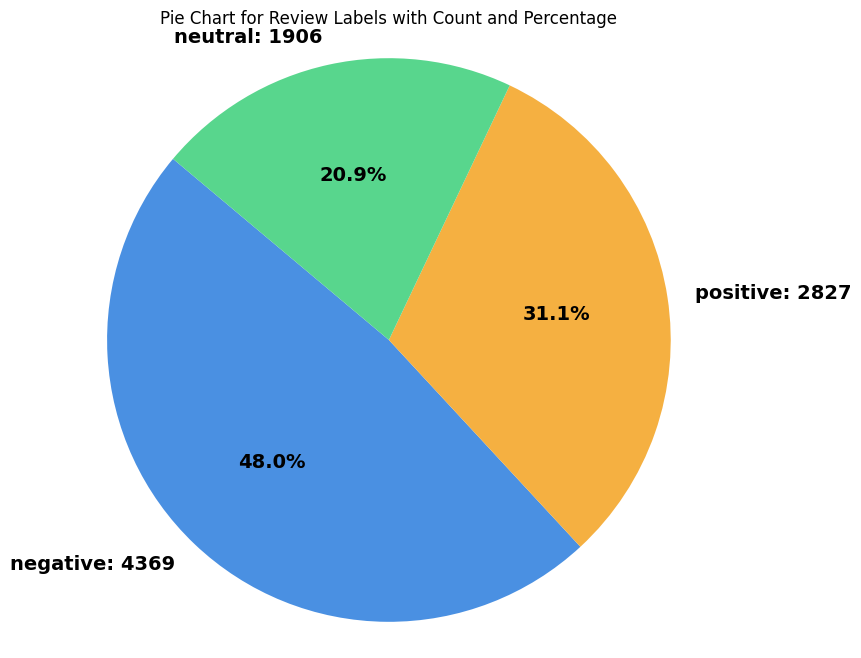

In [22]:
def plot_pie_chart(data, column, colors=None, title="Pie Chart for Review Labels with Count and Percentage"):
    # Calculate the distribution of unique values in the specified column
    pie_data = data[column].value_counts()

    # Sort the data in descending order to maintain consistency in the pie chart
    pie_data = pie_data.sort_values(ascending=False)

    # Extract labels (unique values) and their corresponding counts
    stages = pie_data.index.tolist()
    values = pie_data.values

    # Define default colors if none are provided
    if colors is None:
        colors = ['#4A90E2', '#F5B041', '#58D68D']  # Default colors for Neutral, Negative, and Positive

    # Create labels that include both the category and its count
    labels_with_data = [f'{stage}: {value}' for stage, value in zip(stages, values)]

    # Create a pie chart
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(values, labels=labels_with_data, autopct='%1.1f%%', colors=colors, startangle=140,
           textprops={'fontsize': 14, 'fontweight': 'bold'})

    # Ensure that the pie chart is drawn as a circle by setting equal aspect ratio
    ax.axis('equal')

    # Set the title for the pie chart
    plt.title(title)

    # Display the pie chart
    plt.show()

plot_pie_chart(Manual_df_copy, 'label')

<ipython-input-23-704be28380e6>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='trigram', data=top_trigrams, palette='viridis')


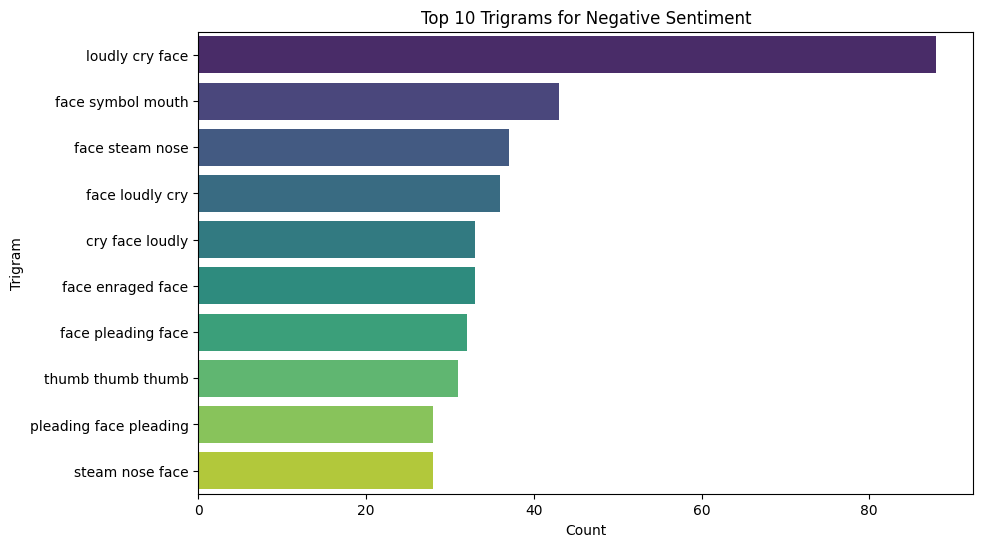

<ipython-input-23-704be28380e6>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='trigram', data=top_trigrams, palette='viridis')


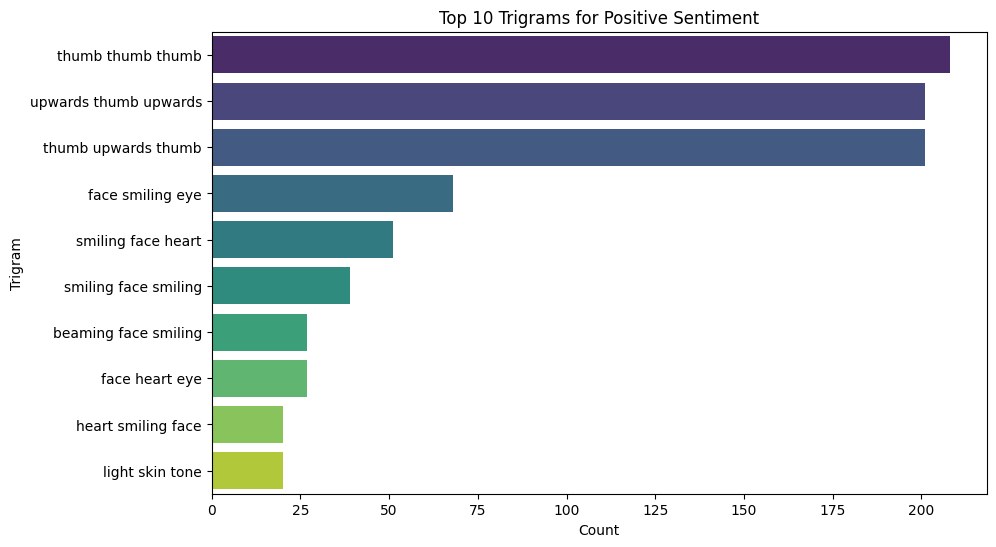

<ipython-input-23-704be28380e6>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='trigram', data=top_trigrams, palette='viridis')


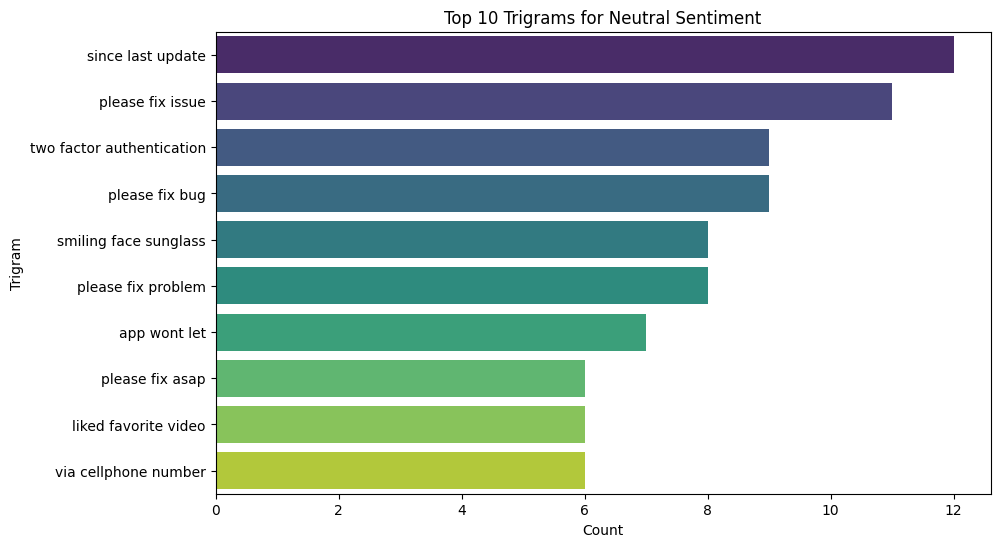

In [23]:
def plot_top_trigrams(df, sentiment_label, n=10):
    # Filter the dataframe for the specified sentiment label and extract the text content
    sentiment_text = df[df['label'] == sentiment_label]['content']

    # Use CountVectorizer to extract trigrams (3-word phrases) from the text
    vectorizer = CountVectorizer(ngram_range=(3, 3), max_features=1000)
    X = vectorizer.fit_transform(sentiment_text)

    # Sum up the counts of each trigram across all documents
    trigrams = X.sum(axis=0)
    trigrams = trigrams.A1  # Convert to a 1D array
    vocab = vectorizer.get_feature_names_out()

    # Create a dataframe with trigrams and their corresponding counts
    trigram_counts = pd.DataFrame({'trigram': vocab, 'count': trigrams})

    # Sort the trigrams by count and select the top n trigrams
    top_trigrams = trigram_counts.sort_values(by='count', ascending=False).head(n)

    # Plot the top n trigrams as a horizontal bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y='trigram', data=top_trigrams, palette='viridis')
    plt.title(f'Top {n} Trigrams for {sentiment_label.capitalize()} Sentiment')
    plt.xlabel('Count')
    plt.ylabel('Trigram')
    plt.show()

plot_top_trigrams(Manual_df_copy, 'negative')
plot_top_trigrams(Manual_df_copy, 'positive')
plot_top_trigrams(Manual_df_copy, 'neutral')